In [1]:
1+1

2

In [ ]:
!git clone https://github.com/JierunChen/Ref-L4.git


Cloning into 'Ref-L4'...
remote: Enumerating objects: 61, done.


remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 61 (delta 25), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 2.44 MiB | 11.56 MiB/s, done.
Resolving deltas: 100% (25/25), done.
ERROR: Directory './' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [2]:
# Change directory to Ref-L4
%cd Ref-L4

# Install the package from the current directory
# !pip install .


/root/Depth-SoM/Ref-L4


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
from ref_l4 import RefL4Dataset
ref_l4_dataset = RefL4Dataset("JierunChen/Ref-L4", split='all')
print(len(ref_l4_dataset))
# iterate over the dataset
for img_pil, data in ref_l4_dataset:
    print(data)
    break

# swith to 'val' or 'test' split
ref_l4_dataset.change_split('val')
print(len(ref_l4_dataset))


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 1053, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.p

images.tar.gz:  30%|###       | 1.07G/3.51G [00:00<?, ?B/s]

Downloaded images.tar.gz to /root/.cache/huggingface/hub/datasets--JierunChen--Ref-L4/snapshots/d62c4f4e5f3a639b34adab34e5c8ffeb39f168c1/images.tar.gz
Loading images from /root/.cache/huggingface/hub/datasets--JierunChen--Ref-L4/snapshots/d62c4f4e5f3a639b34adab34e5c8ffeb39f168c1/images.tar.gz


100%|██████████| 9735/9735 [00:17<00:00, 559.66it/s] 

45341
{'id': 1, 'caption': 'Within the central picture frame of the three, an antique camera is present.', 'bbox': [580.6163330048, 179.4965209869, 93.59924316159993, 112.1013793848], 'bbox_area': 10492.60426778866, 'bbox_id': 'o365_527361', 'ori_category_id': 'o365_64', 'image_id': 'o365_922765', 'height': 741, 'width': 1024, 'file_name': 'objects365_v2_00922765.jpg', 'is_rewrite': True, 'split': 'val'}
13420


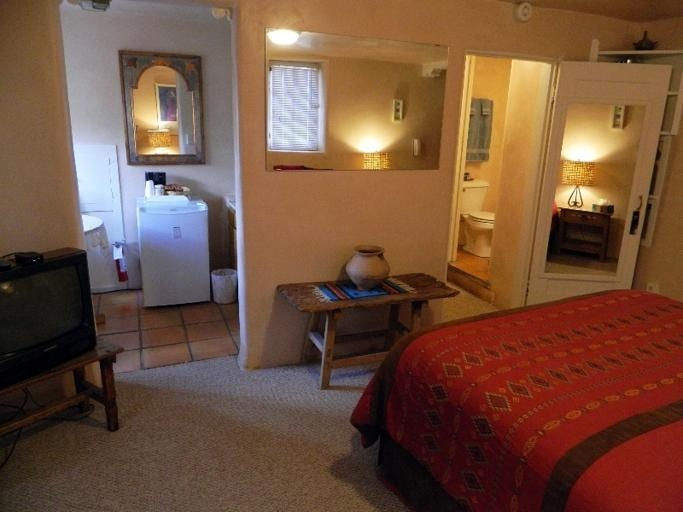

In [8]:
ref_l4_dataset[2][0]

In [9]:
ref_l4_dataset[2][1]

{'id': 4,
 'caption': 'The white washing machine in the room corner, near the entrance to the bathroom with the door ajar.',
 'bbox': [135.56219481850002,
  194.3108520448,
  74.94299316569999,
  114.73577881600002],
 'bbox_area': 8598.642687668755,
 'bbox_id': 'o365_27475021',
 'ori_category_id': 'o365_221',
 'image_id': 'o365_546894',
 'height': 512,
 'width': 683,
 'file_name': 'objects365_v1_00546894.jpg',
 'is_rewrite': False,
 'split': 'val'}

In [14]:
ref_l4_dataset[1]

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=683x512>,
 {'id': 3,
  'caption': 'A laundry appliance situated under a wall-mounted mirror.',
  'bbox': [135.56219481850002,
   194.3108520448,
   74.94299316569999,
   114.73577881600002],
  'bbox_area': 8598.642687668755,
  'bbox_id': 'o365_27475021',
  'ori_category_id': 'o365_221',
  'image_id': 'o365_546894',
  'height': 512,
  'width': 683,
  'file_name': 'objects365_v1_00546894.jpg',
  'is_rewrite': False,
  'split': 'val'})

In [18]:
import random

def sample_and_save_dataset(dataset, num_samples=400, save_dir="sampled_images", metadata_file="sampled_metadata.json"):
    """
    Sample a subset of images and save them along with metadata.

    Parameters:
    - dataset (RefL4Dataset): The dataset object.
    - num_samples (int): Number of images to sample.
    - save_dir (str): Directory to save sampled images.
    - metadata_file (str): JSON file for sampled metadata.
    """
    os.makedirs(save_dir, exist_ok=True)
    
    # Randomly select 400 indices
    sampled_indices = random.sample(range(len(dataset)), min(num_samples, len(dataset)))
    
    sampled_metadata = []
    for idx in sampled_indices:
        img, data = dataset[idx]
        img_path = os.path.join(save_dir, data['file_name'])
        img.save(img_path)  # Save image
        data['file_name'] = img_path
        sampled_metadata.append(data)  # Store metadata
    
    # Save metadata as JSON
    with open(metadata_file, "w") as f:
        json.dump(sampled_metadata, f, indent=4)
    
    print(f"Saved {len(sampled_metadata)} images in {save_dir}, metadata saved in {metadata_file}")
    return sampled_metadata

# Example usage
sampled_metadata = sample_and_save_dataset(ref_l4_dataset, num_samples=400, save_dir="sampled_images", metadata_file="sampled_metadata.json")


Saved 400 images in sampled_images, metadata saved in sampled_metadata.json


In [19]:
sampled_metadata

[{'id': 4381,
  'caption': 'A pair of tortillas containing a visible filling are positioned next to a heap of rice on a round plate.',
  'bbox': [300.2558593649,
   239.4251098624,
   183.92150883559998,
   133.25628661759998],
  'bbox_area': 24508.697296538157,
  'bbox_id': 'o365_24196196',
  'ori_category_id': 'o365_172',
  'image_id': 'o365_489077',
  'height': 512,
  'width': 769,
  'file_name': 'sampled_images/objects365_v1_00489077.jpg',
  'is_rewrite': True,
  'split': 'val'},
 {'id': 3385,
  'caption': 'The closed-top, white bucket-shaped item, positioned among numerous cooking tools and food receptacles at the street food stand.',
  'bbox': [647.2612304896,
   556.6437988608,
   98.25061038079991,
   106.61242675200003],
  'bbox_area': 10474.736002562324,
  'bbox_id': 'o365_3289057',
  'ori_category_id': 'o365_49',
  'image_id': 'o365_1040341',
  'height': 768,
  'width': 1024,
  'file_name': 'sampled_images/objects365_v2_01040341.jpg',
  'is_rewrite': True,
  'split': 'val'},

In [30]:
from datasets import Dataset, Image
import pandas as pd

def create_hf_dataset(metadata_list, image_dir="/root/Depth-SoM/Ref-L4"):
    """
    Create a Hugging Face dataset from metadata and images.

    Parameters:
    - metadata_list (list of dicts): List of image metadata.
    - image_dir (str): Directory containing image files.

    Returns:
    - dataset (datasets.Dataset): Hugging Face dataset.
    """
    # Convert to Pandas DataFrame
    df = pd.DataFrame(metadata_list)

    # Update file paths to include the full directory
    df["image"] = df["file_name"].apply(lambda x: f"{image_dir}/{x}")

    # Convert DataFrame to Hugging Face Dataset
    dataset = Dataset.from_pandas(df).cast_column("image", Image())

    return dataset


hf_dataset = create_hf_dataset(sampled_metadata)
print(hf_dataset)


Dataset({
    features: ['id', 'caption', 'bbox', 'bbox_area', 'bbox_id', 'ori_category_id', 'image_id', 'height', 'width', 'file_name', 'is_rewrite', 'split', 'image'],
    num_rows: 400
})


In [31]:
hf_dataset["image"]

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=769x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x318>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x427>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x429>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x689>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3648x2736>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4002x2033>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4200x2827>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x640>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x640>,

In [32]:

hf_dataset

Dataset({
    features: ['id', 'caption', 'bbox', 'bbox_area', 'bbox_id', 'ori_category_id', 'image_id', 'height', 'width', 'file_name', 'is_rewrite', 'split', 'image'],
    num_rows: 400
})

In [33]:
# Push the cleaned dataset to Hugging Face Hub
hf_user = "Rajarshi-Roy-research"  # Your Hugging Face username
dataset_name = "refcocog-eval-depth"  # The dataset name
commit_message = "Adding refcoco data with image"



# Authenticate with Hugging Face
hf_token=""  # Replace with your actual token
private = False

In [34]:
try:
    hf_dataset.push_to_hub(f"{hf_user}/{dataset_name}", commit_message=commit_message, token=hf_token, private=private)
    print(f"Dataset {hf_user}/{dataset_name} uploaded.")
except Exception as e:
    print(f"Error pushing to Hugging Face Hub: {e}")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Dataset Rajarshi-Roy-research/refcocog-eval-depth uploaded.
